In [ ]:
# Importing libraries
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
import zipfile
import os
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.regularizers import l2

In [ ]:
# loading data
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/dogs-vs-cats-vvsmall.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
base_dir = '/tmp/dogs-vs-cats-vvsmall'

In [ ]:
train_dir = os.path.join(base_dir, 'train') 

In [ ]:
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cat_dir = os.path.join(train_dir, 'cats')

In [ ]:
train_dog_dir = os.path.join(train_dir, 'dogs')

In [ ]:
validation_cat_dir = os.path.join(validation_dir, 'cats')

In [ ]:
validation_dog_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
#Defining the parameters of the model
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)

In [ ]:
#Defining the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
#Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])
kernel_regularizer=keras.regularizers.l2

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [ ]:
#Preparing the training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
#Training the model
model.fit_generator(
    train_generator,
    
    epochs=60,
    validation_data=validation_generator,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
    
    use_multiprocessing=True,
    workers=4)


<ipython-input-15-c22c52bb207b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/60
188/188 [==============================] - 67s 294ms/step - loss: 0.6835 - accuracy: 0.5482 - val_loss: 0.6563 - val_accuracy: 0.6028
Epoch 2/60
188/188 [==============================] - 58s 305ms/step - loss: 0.6490 - accuracy: 0.6223 - val_loss: 0.6118 - val_accuracy: 0.6750
Epoch 3/60
188/188 [==============================] - 57s 302ms/step - loss: 0.6206 - accuracy: 0.6598 - val_loss: 0.6322 - val_accuracy: 0.6194
Epoch 4/60
188/188 [==============================] - 57s 302ms/step - loss: 0.6037 - accuracy: 0.6788 - val_loss: 0.6025 - val_accuracy: 0.6617
Epoch 5/60
188/188 [==============================] - 57s 302ms/step - loss: 0.5889 - accuracy: 0.6955 - val_loss: 0.5654 - val_accuracy: 0.7189
Epoch 6/60
188/188 [==============================] - 59s 307ms/step - loss: 0.5818 - accuracy: 0.6980 - val_loss: 0.5412 - val_accuracy: 0.7117
Epoch 7/60
188/188 [==============================] - 60s 313ms/step - loss: 0.5720 - accuracy: 0.7070 - val_loss: 0.5327 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [ ]:
#Getting the training and testing accuracy
train_acc = model.history.history['accuracy']
test_acc = model.history.history['val_accuracy']
train_loss= model.history.history['loss']
test_loss= model.history.history['val_loss']


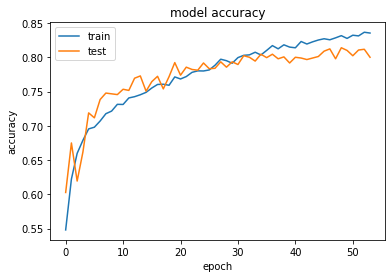

In [ ]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

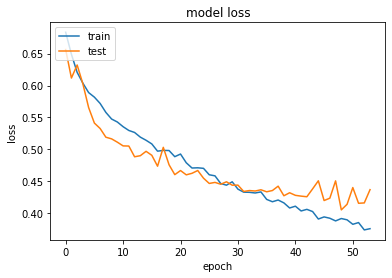

In [ ]:
# summarize the history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()